# THE SPARKS FOUNDATION

## NAME:RITIK BANERJEE 

## Cluster the given iris dataset using Kmeans Clustering

In [2]:
#importing the libraries
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [15]:
#reading the give dataset
iris<-read.csv("Iris.csv")

In [4]:
head(iris)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
iris_features<-iris

In [6]:
iris_features$Species=NULL

In [7]:
head(iris_features)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


### Now to find the optimum number of clusters we use the elbow method

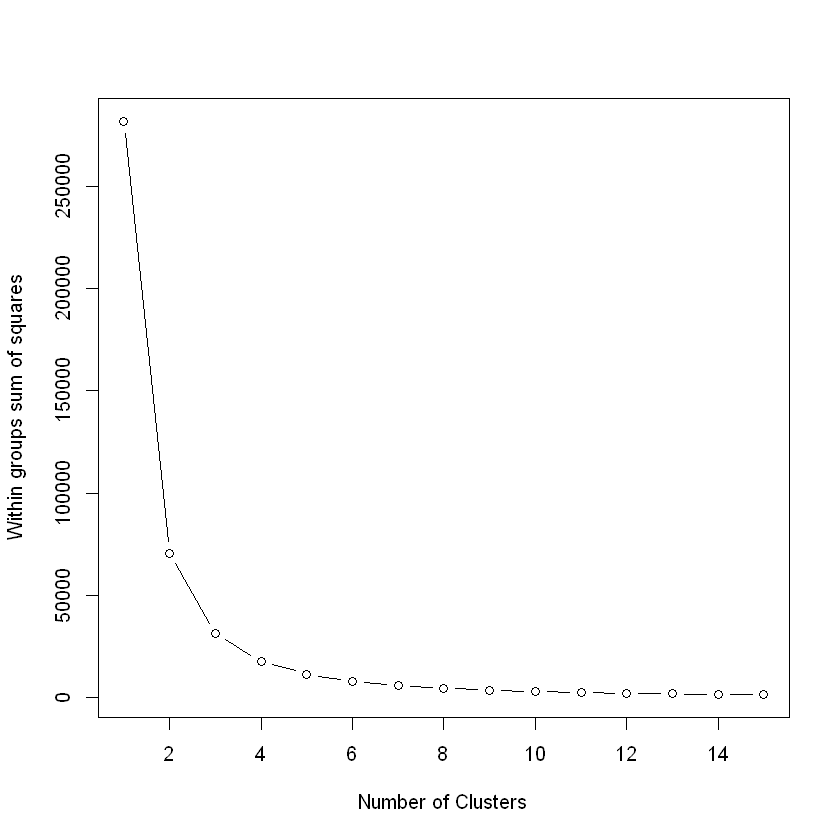

In [8]:
wss <- (nrow(iris_features)-1)*sum(apply(iris_features,2,var))
  for (i in 2:15) wss[i] <- sum(kmeans(iris_features,centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares")

### As we can see by the graph the elbow drop is around 3 so the no. of optimum clusters should be around 3 

## Now lets use K means on the data set

In [9]:
k<-kmeans(iris_features,3)

In [10]:
k

K-means clustering with 3 clusters of sizes 50, 50, 50

Cluster means:
     Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1 125.5         6.588        2.974         5.552        2.026
2  25.5         5.006        3.418         1.464        0.244
3  75.5         5.936        2.770         4.260        1.326

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

Within cluster sum of squares by cluster:
[1] 10456.03 10427.74 10443.12
 (between_SS / total_SS =  88.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [11]:
#now lets a take alook at the centroids
k$centers

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125.5,6.588,2.974,5.552,2.026
25.5,5.006,3.418,1.464,0.244
75.5,5.936,2.770,4.260,1.326


## Now lets Visualise the clusters for SepalLength and SepalWidth

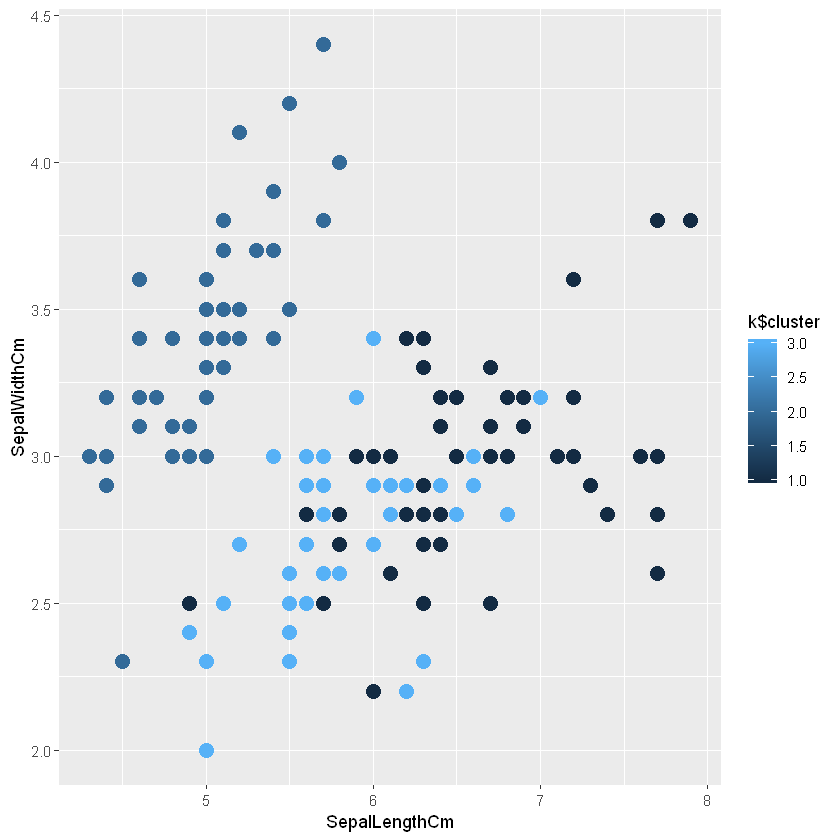

In [12]:
ggplot(iris_features)+
geom_point(aes(x=SepalLengthCm,y=SepalWidthCm,col=k$cluster),size=4)

## Lets visualise the plot using the Species section 

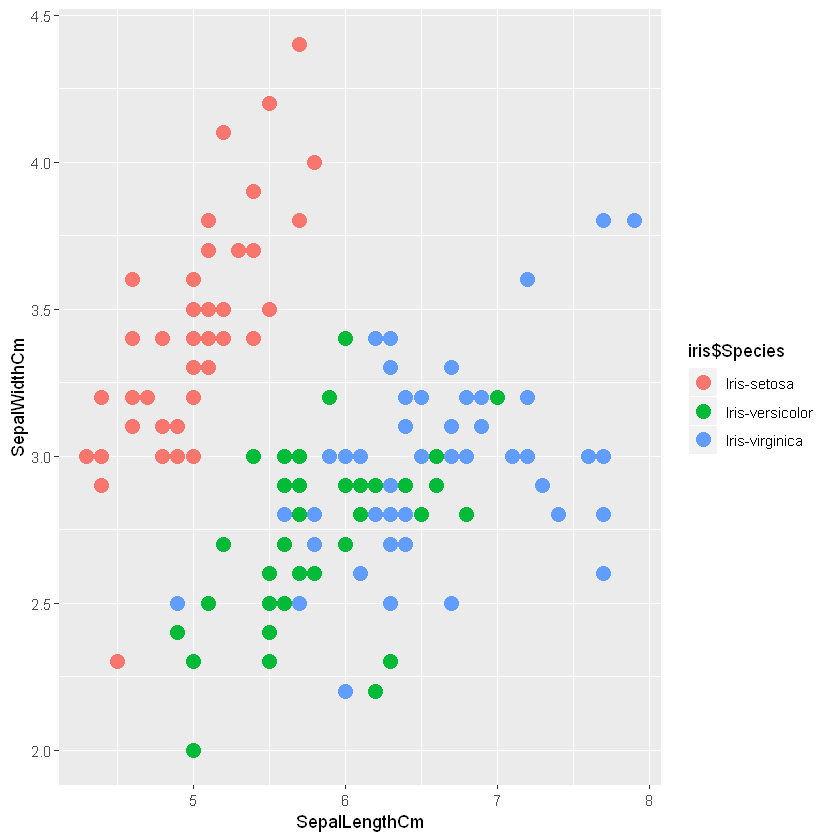

In [13]:
ggplot(iris_features)+
geom_point(aes(x=SepalLengthCm,y=SepalWidthCm,col=iris$Species),size=4)

### After observing both plots we can say that these two plots are almost identical

In [14]:
table(k$cluster,iris$Species)

   
    Iris-setosa Iris-versicolor Iris-virginica
  1           0               0             50
  2          50               0              0
  3           0              50              0

## As we can observe by the table the kmeans cluster has clustered the values perfectly 